Generate a clear statement problem and provide location for dataset
There is a buyer who wants to know what factors make a house sell for a high price. 
The dataset can be found here: https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv

Provide a clear solution to the problem for a non-technical audience
We are going to see which facotrs have a strong correlation with price, and look at these factors in graphs too. 

Visually explore the data to generate insight and include summary statistics

Import packages

In [121]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

Read File and replace "?" with NANs

In [122]:
def read_house_data(fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv"):

    house_data = pd.read_csv(fileName, parse_dates = ['date'],
                             index_col = ['date'])
 
    house_data = house_data.replace(to_replace=" ?", value=float("NaN"))
 
    house_data.isnull().sum()
 
    return house_data
 
house_data = read_house_data()

Check data types

In [123]:
print(house_data.dtypes)

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


change floats to int

In [124]:
house_data.price = house_data.price.astype(int)
house_data.bathrooms = house_data.bathrooms.astype(int)
house_data.floors = house_data.floors.astype(int)
house_data.lat = house_data.lat.astype(int)
house_data.long = house_data.long.astype(int)

In [125]:
print(house_data.dtypes)

id               int64
price            int64
bedrooms         int64
bathrooms        int64
sqft_living      int64
sqft_lot         int64
floors           int64
waterfront       int64
view             int64
condition        int64
grade            int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
zipcode          int64
lat              int64
long             int64
sqft_living15    int64
sqft_lot15       int64
dtype: object


Check data shape

In [126]:
print(house_data.shape)

(21613, 20)


Get a glance and feel for the data

In [127]:
print(house_data.head)

<bound method NDFrame.head of                     id    price  bedrooms  bathrooms  sqft_living  sqft_lot  \
date                                                                          
2014-10-13  7129300520   221900         3          1         1180      5650   
2014-12-09  6414100192   538000         3          2         2570      7242   
2015-02-25  5631500400   180000         2          1          770     10000   
2014-12-09  2487200875   604000         4          3         1960      5000   
2015-02-18  1954400510   510000         3          2         1680      8080   
2014-05-12  7237550310  1225000         4          4         5420    101930   
2014-06-27  1321400060   257500         3          2         1715      6819   
2015-01-15  2008000270   291850         3          1         1060      9711   
2015-04-15  2414600126   229500         3          1         1780      7470   
2015-03-12  3793500160   323000         3          2         1890      6560   
2015-04-03  1736800520

View mean, standard, min, and other summary statistics

In [128]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.0,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.0,-121.931754,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.0,0.252173,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.0,-122.000000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.0,-122.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.0,-122.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.0,-122.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.0,-121.000000,6210.000000,871200.000000


We are going to truncate part of the date column

Convert the string values of year and month to datetime type.
Use the datatime object to set the index of the Pandas Series.
Print the head and tail of the Pandas Series.

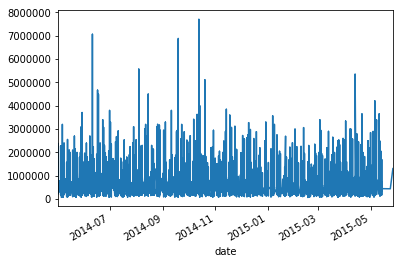

In [129]:
house_data['price'].plot()
plt.show()

I dont see much of a pattern, price by dates. There are several peaks, but maybe we don't have enough annual data to determine a cycle in pricing. 

Standardize data so we can compare them.

In [130]:
cols_to_norm = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'sqft_living','condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 'zipcode', 'long','sqft_living15','sqft_lot15']
house_data[cols_to_norm] = house_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [131]:
print(house_data)

                  id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
date                                                                         
2014-10-13  0.720103  0.019266  0.090909      0.125     0.067170  0.003108   
2014-12-09  0.647853  0.060721  0.090909      0.250     0.172075  0.004072   
2015-02-25  0.568795  0.013770  0.060606      0.125     0.036226  0.005743   
2014-12-09  0.251157  0.069377  0.121212      0.375     0.126038  0.002714   
2015-02-18  0.197333  0.057049  0.090909      0.250     0.104906  0.004579   
2014-05-12  0.731039  0.150820  0.121212      0.500     0.387170  0.061429   
2014-06-27  0.133387  0.023934  0.090909      0.250     0.107547  0.003816   
2015-01-15  0.202748  0.028439  0.090909      0.125     0.058113  0.005567   
2015-04-15  0.243823  0.020262  0.090909      0.125     0.112453  0.004210   
2015-03-12  0.383120  0.032525  0.090909      0.250     0.120755  0.003659   
2015-04-03  0.175351  0.077049  0.090909      0.250     0.246792

In [132]:
house_data[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'sqft_living','condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 'zipcode','lat', 'long','sqft_living15','sqft_lot15']].cov()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_living,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,0.084443,-0.000235,0.000011,-0.000001,-0.000247,-0.000963,0.001533,-0.000068,0.000645,-0.000247,...,0.000231,-0.000286,-0.000137,0.001587,-0.000979,-0.000646,0.0,0.000753,-0.000099,-0.001265
price,-0.000235,0.002318,0.000418,0.002256,0.002343,0.000108,0.003152,0.001110,0.003665,0.002343,...,0.003148,0.002647,0.001432,0.000664,0.001214,-0.000692,0.0,-0.000180,0.003324,0.000125
bedrooms,0.000011,0.000418,0.000794,0.001210,0.001127,0.000022,0.001210,-0.000016,0.000429,0.001127,...,0.000985,0.001222,0.000784,0.001110,0.000106,-0.001163,0.0,0.000029,0.001302,0.000026
bathrooms,-0.000001,0.002256,0.001210,0.008438,0.004444,0.000197,0.012289,0.000467,0.003119,0.004444,...,0.005458,0.005338,0.002116,0.010175,0.001107,-0.003966,0.0,0.001528,0.005526,0.000233
sqft_living,-0.000247,0.002343,0.001127,0.004444,0.004805,0.000301,0.006758,0.000623,0.003780,0.004805,...,0.005179,0.005517,0.002769,0.005631,0.000765,-0.003736,0.0,0.001538,0.006184,0.000398
sqft_lot,-0.000963,0.000108,0.000022,0.000197,0.000301,0.000630,-0.000062,0.000047,0.000359,0.000301,...,0.000279,0.000418,0.000035,0.000340,0.000038,-0.000879,0.0,0.001345,0.000428,0.000565
floors,0.001533,0.003152,0.001210,0.012289,0.006758,-0.000062,0.076147,0.000469,0.001304,0.006758,...,0.012775,0.012977,-0.005976,0.040783,-0.000428,-0.007214,0.0,0.006867,0.009652,-0.000115
waterfront,-0.000068,0.001110,-0.000016,0.000467,0.000623,0.000047,0.000469,0.007485,0.006661,0.000623,...,0.000701,0.000566,0.000640,-0.000578,0.001602,0.000708,0.0,-0.000515,0.000882,0.000083
view,0.000645,0.003665,0.000429,0.003119,0.003780,0.000359,0.001304,0.006661,0.036703,0.003780,...,0.004716,0.002916,0.004872,-0.002615,0.003969,0.004391,0.0,-0.000215,0.006337,0.000436
sqft_living,-0.000247,0.002343,0.001127,0.004444,0.004805,0.000301,0.006758,0.000623,0.003780,0.004805,...,0.005179,0.005517,0.002769,0.005631,0.000765,-0.003736,0.0,0.001538,0.006184,0.000398


We can see some variables have a stronger correlation than others. These factors have a high correlation with price: sqft_living, bathrooms, grade, sqft_above, sqft_living15. There are other variables that show some correlation, but not as strongly as the ones mentioned above: bedrooms, view, waterfront and floors. I didn't see any variables that have a strong negative correlation. 

In [93]:
house_corr = house_data[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 'zipcode', 'long','sqft_living15','sqft_lot15']].corr()
house_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,-0.000038,-0.012258,-0.132109,0.019120,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,0.010276,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.510072,0.702035,0.089661,0.237211,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,-0.014842,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.467452,0.576671,0.031703,0.155643,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,0.004145,0.391638,0.029244
bathrooms,-0.000038,0.510072,0.467452,1.000000,0.697875,0.085310,0.484822,0.058798,0.177257,-0.126016,0.606631,0.639933,0.250880,0.433647,0.060436,-0.159773,0.065953,0.510049,0.080779
sqft_living,-0.012258,0.702035,0.576671,0.697875,1.000000,0.172826,0.353321,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.087998,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.085310,0.172826,1.000000,-0.008951,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,0.212525,0.144608,0.718557
floors,0.019120,0.237211,0.155643,0.484822,0.353321,-0.008951,1.000000,0.019640,0.024658,-0.293173,0.472608,0.517913,-0.235836,0.578619,-0.007775,-0.096743,0.098689,0.296561,-0.013252
waterfront,-0.002721,0.266369,-0.006582,0.058798,0.103818,0.021604,0.019640,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.023592,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.177257,0.284611,0.074710,0.024658,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,-0.004453,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.126016,-0.058753,-0.008958,-0.293173,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.096406,-0.092824,-0.003406


Text(0.5, 0, 'sqft_living')

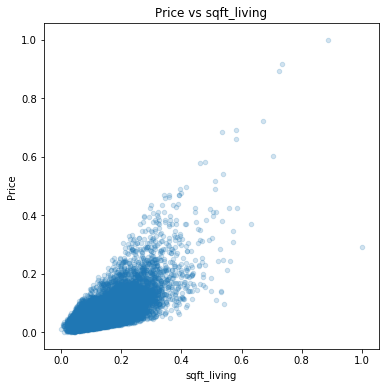

In [133]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
house_data.plot.scatter(x = 'sqft_living', y = 'price', ax = ax, alpha = 0.2)
ax.set_title('Price vs sqft_living') # Give the plot a main title
ax.set_ylabel('Price')# Set text for y axis
ax.set_xlabel('sqft_living')

Looks like there are quite a few outliers, however there does appear to be an upward trend between sqft_living and price.

Text(0.5, 1.0, 'Price vs grade \n with bathrooms by color')

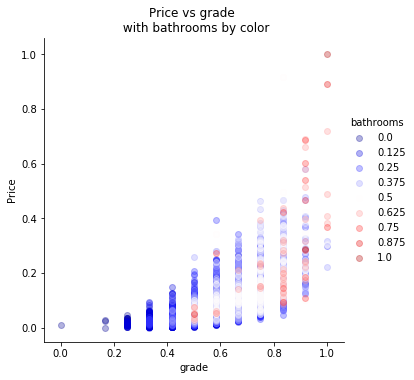

In [134]:
sns.lmplot(x = 'grade', y = 'price', 
           data = house_data, 
           hue = "bathrooms", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('grade')
plt.ylabel('Price')
plt.title('Price vs grade \n with bathrooms by color')

Here we can see an increase in bathrooms correlates to increase in price as well as an increase in grades results in an increase in price as well.

Text(0.5, 1.0, 'sqft_above vs price\n with sqft_living by color')

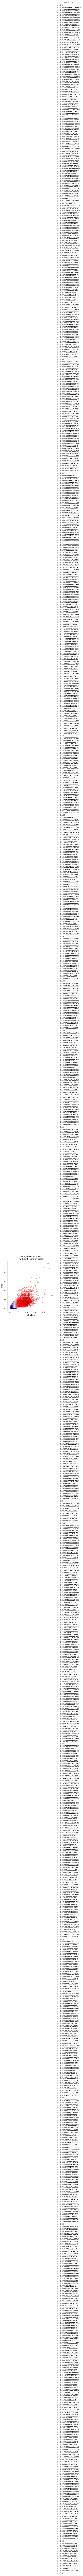

In [135]:
sns.lmplot(x = 'sqft_above', y = 'price', 
           data = house_data, 
           hue = "sqft_living", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.title('sqft_above vs price\n with sqft_living by color')

Here we can see a huge range in sqft_above and price, there is definitely a slight incline in price as sqft_above increases, however there is still a large variance and quite a few outliers. This graph looks a bit like the sqft_living and price graph.

Text(0.5, 1.0, 'bedrooms vs price\n with sqft_living by color')

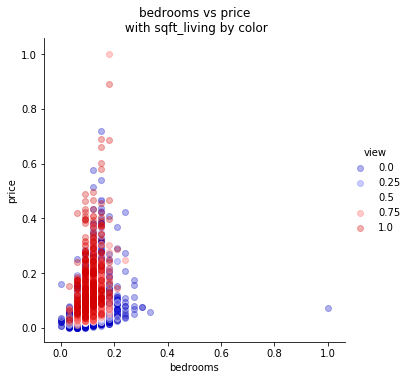

In [136]:
sns.lmplot(x = 'bedrooms', y = 'price', 
           data = house_data, 
           hue = "view", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('bedrooms vs price\n with sqft_living by color')

Looks like homes with views tend to be priced higher than those without views. There is also a slight incline in price due to the number of bathrooms a house has.

Text(0.5, 1.0, 'Price vs floors \n with waterfront by color')

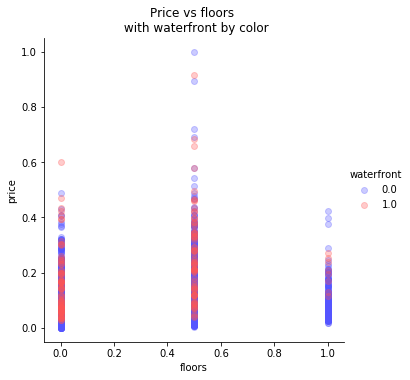

In [137]:
sns.lmplot(x = 'floors', y = 'price', 
           data = house_data, 
           hue = "waterfront", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('floors')
plt.ylabel('price')
plt.title('Price vs floors \n with waterfront by color')

Here we can see that for houses with one or two floors tend to have waterfront views. However houses with three floors tend to not have a waterfront view, and despite having more floors do not have the same price as those houses with one or two floors that have waterfront views. Here, I would say having a waterfront view is more of a factor when looking at what makes a house more expensive. 

Conclusion: based on what I can tell from exploring the data, the most important factors that make a house expensive are views, waterfronts, squarefootage and number of bathrooms. 